## Importação das bibliotecas

In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2, mobilenet_v2, VGG16, vgg16, ResNet50, resnet50, EfficientNetB0, efficientnet, imagenet_utils
from tensorflow.keras.preprocessing import image

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pprint import pprint
import pathlib
import PIL
import glob

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Instanciação dos modelos

In [2]:
model_mobilenetv2 = MobileNetV2()
model_vgg16 = VGG16()
model_resnet50 = ResNet50()
model_efficientnet = EfficientNetB0()

21848064/21834768 [==============================] - 0s 0us/step


## Pré-processamento dos dados

Redimensionaremos as imagens para se adequar ao input da ImageNet

In [3]:
modules = {
    "mobilenetv2": mobilenet_v2,
    "vgg16": vgg16,
    "resnet50": resnet50,
    "efficientnet": efficientnet
}

In [4]:
def prepare_image(file, model_name):
    img = image.load_img(file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return modules[model_name].preprocess_input(img_array_expanded_dims)

## Predição dos modelos

49152/35363 [=========================================] - 0s 0us/step


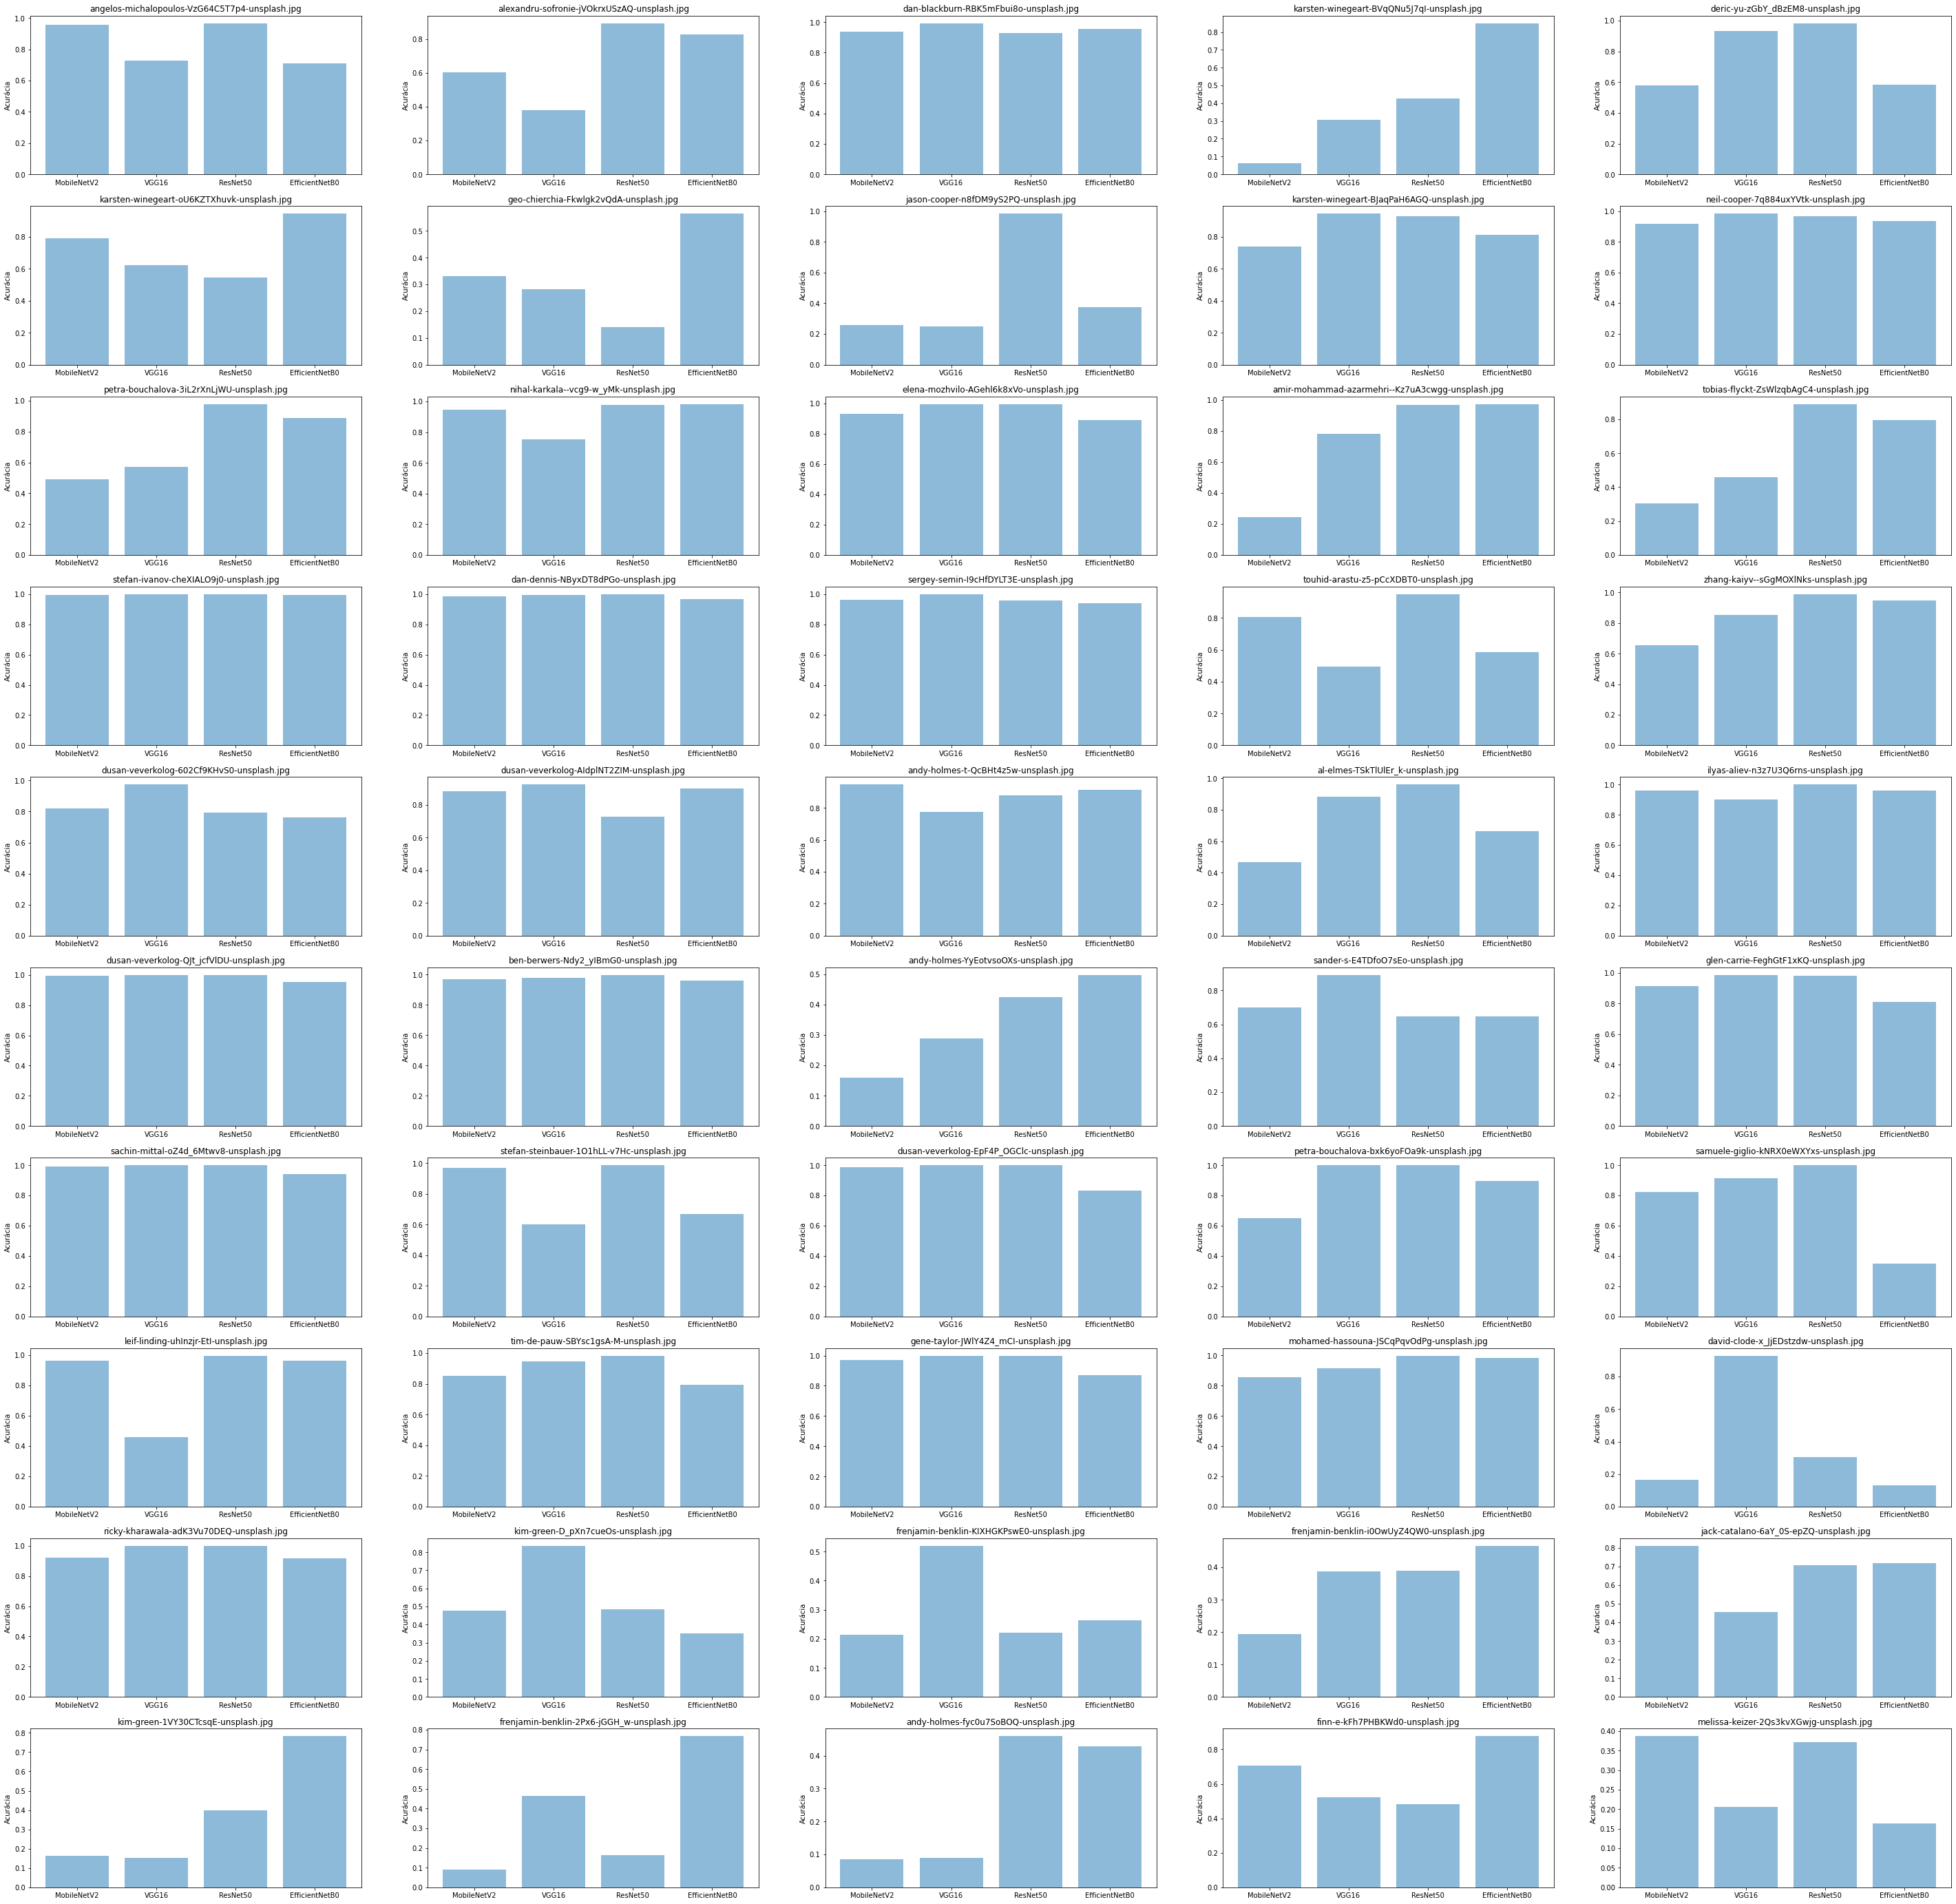

In [5]:
predict_images = []

path = '/content/gdrive/MyDrive/UFSC/TCC - Bruno e Thiago/dataset2/**/*.*'
for file in glob.glob(path):
  predict_images.append(file)

y_true = []

y_pred = {
    'mobilenetv2': [],
    'vgg16': [],
    'resnet50': [],
    'efficientnet': [],
}

accuracy = {
    'mobilenetv2': [],
    'vgg16': [],
    'resnet50': [],
    'efficientnet': [],
}

confidences = {}

plt.figure(figsize=(50, 50))
labels = ['MobileNetV2', 'VGG16', 'ResNet50', 'EfficientNetB0']
y_pos = np.arange(len(labels))

for index, image_path in enumerate(predict_images):
    image_name = image_path[image_path.rfind('/') + 1:]
    folder_and_file = image_path[image_path.rfind('dataset2') + 9:]
    true_class = folder_and_file[:folder_and_file.rfind('/')]

    y_true.append(true_class)

    preprocessed_image_mobilenetv2 = prepare_image(image_path, "mobilenetv2")
    preprocessed_image_VGG16 = prepare_image(image_path, "vgg16")
    preprocessed_image_resnet50 = prepare_image(image_path, "resnet50")
    preprocessed_image_efficientnet = prepare_image(image_path, "efficientnet")

    predictions_mobilenetv2 = model_mobilenetv2.predict(preprocessed_image_mobilenetv2)
    predictions_vgg16 = model_vgg16.predict(preprocessed_image_VGG16)
    predictions_resnet50 = model_resnet50.predict(preprocessed_image_resnet50)
    predictions_efficientnet = model_efficientnet.predict(preprocessed_image_efficientnet)

    decoded_mobilenetv2 = imagenet_utils.decode_predictions(predictions_mobilenetv2, 1)[0][0]
    decoded_vgg16 = imagenet_utils.decode_predictions(predictions_vgg16, 1)[0][0]
    decoded_resnet50 = imagenet_utils.decode_predictions(predictions_resnet50, 1)[0][0]
    decoded_efficientnet = imagenet_utils.decode_predictions(predictions_efficientnet, 1)[0][0]

    y_pred['mobilenetv2'].append(decoded_mobilenetv2[1])
    y_pred['vgg16'].append(decoded_vgg16[1])
    y_pred['resnet50'].append(decoded_resnet50[1])
    y_pred['efficientnet'].append(decoded_efficientnet[1])

    accuracy['mobilenetv2'].append(decoded_mobilenetv2[2])
    accuracy['vgg16'].append(decoded_vgg16[2])
    accuracy['resnet50'].append(decoded_resnet50[2])
    accuracy['efficientnet'].append(decoded_efficientnet[2])

    confidences[image_path] = [
      decoded_mobilenetv2[2],
      decoded_vgg16[2],
      decoded_resnet50[2],
      decoded_efficientnet[2]
    ]

    plt.subplot(10, 5, index + 1)
    plt.bar(y_pos, confidences[image_path], align='center', alpha=0.5)
    plt.xticks(y_pos, labels)
    plt.ylabel('Acurácia')
    plt.title(image_name)

plt.show()

In [6]:
for model_name, accuracies in accuracy.items():
    avg_accuracy = sum(accuracies) / len(accuracies)
    print(f"Acurácia média para {model_name}: {avg_accuracy}")

Acurácia média para mobilenetv2: 0.6718011212348938
Acurácia média para vgg16: 0.726376438587904
Acurácia média para resnet50: 0.7964929300546646
Acurácia média para efficientnet: 0.754963084757328


[[4 0 0 0 0]
 [0 7 0 0 0]
 [0 0 2 0 0]
 [0 0 0 9 0]
 [0 0 0 0 9]]


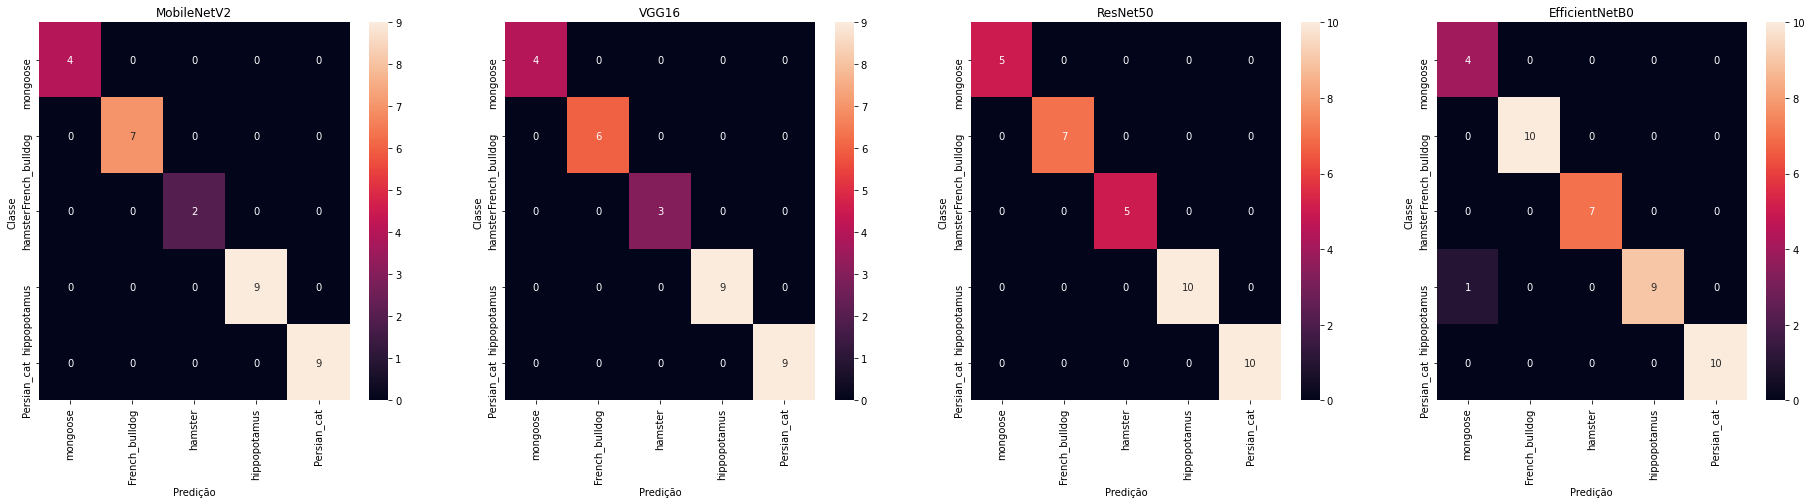

In [ ]:
matrix_labels = ['mongoose', 'French_bulldog', 'hamster', 'hippopotamus', 'Persian_cat']

matrix_mobilenetv2 = confusion_matrix(y_true, y_pred['mobilenetv2'], labels=matrix_labels)
matrix_vgg16 = confusion_matrix(y_true, y_pred['vgg16'], labels=matrix_labels)
matrix_resnet50 = confusion_matrix(y_true, y_pred['resnet50'], labels=matrix_labels)
matrix_efficientnet = confusion_matrix(y_true, y_pred['efficientnet'], labels=matrix_labels)

plt.figure(figsize=(32, 32))

plt.subplot(4, 4, 1)
sns.heatmap(matrix_mobilenetv2, xticklabels=matrix_labels, yticklabels=matrix_labels, annot=True, fmt='g')
plt.xlabel('Predição')
plt.ylabel('Classe')
plt.title('MobileNetV2')

plt.subplot(4, 4, 2)
sns.heatmap(matrix_vgg16, xticklabels=matrix_labels, yticklabels=matrix_labels, annot=True, fmt='g')
plt.xlabel('Predição')
plt.ylabel('Classe')
plt.title('VGG16')

plt.subplot(4, 4, 3)
sns.heatmap(matrix_resnet50, xticklabels=matrix_labels, yticklabels=matrix_labels, annot=True, fmt='g')
plt.xlabel('Predição')
plt.ylabel('Classe')
plt.title('ResNet50')

plt.subplot(4, 4, 4)
sns.heatmap(matrix_efficientnet, xticklabels=matrix_labels, yticklabels=matrix_labels, annot=True, fmt='g')
plt.xlabel('Predição')
plt.ylabel('Classe')
plt.title('EfficientNetB0')

plt.show()

# =========================

In [ ]:
# data_dir = '/content/gdrive/MyDrive/UFSC/TCC - Bruno e Thiago/dataset2'
# data_dir = pathlib.Path(data_dir)

# batch_size = 32
# img_height = 224
# img_width = 224

# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

# class_names = train_ds.class_names
# print(class_names)

# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixels values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [ ]:
# epochs = 10

# # MobileNetV2

# model_mobilenetv2.compile(
#   optimizer='adam',
#   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#   metrics=['accuracy']
# )

# history_mobilenetv2 = model_mobilenetv2.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

# # VGG16

# model_vgg16.compile(
#   optimizer='adam',
#   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#   metrics=['accuracy']
# )

# history_vgg16 = model_vgg16.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

# # ResNet50

# model_resnet50.compile(
#   optimizer='adam',
#   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#   metrics=['accuracy']
# )

# history_resnet50 = model_resnet50.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

# # EfficientNetB0

# model_efficientnet.compile(
#   optimizer='adam',
#   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#   metrics=['accuracy']
# )

# history_efficientnet = model_efficientnet.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )